<a href="https://colab.research.google.com/github/neriandria/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [5]:
df = pd.concat([X, pd.DataFrame(y, columns=['income'])], axis=1)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.shape

(48842, 15)

In [9]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Cleaning the dataset

Removing "." in income

In [10]:
df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'}, inplace=True)

Removing extra spaces

In [11]:
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['relationship'] = df['relationship'].str.strip()
df['race'] = df['race'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native-country'] = df['native-country'].str.strip()

Identifying rows with "?" values and replacing them with "NaN"

In [12]:
#Find rows with "?" values in Adult dataset
question_mark_rows = df[df.apply(lambda row: row.astype(str).str.contains('\?')).any(axis=1)]

print("Rows with '?' values in Adult dataset:")
print(question_mark_rows)

Rows with '?' values in Adult dataset:
       age workclass  fnlwgt     education  education-num  \
14      40   Private  121772     Assoc-voc             11   
27      54         ?  180211  Some-college             10   
38      31   Private   84154  Some-college             10   
51      18   Private  226956       HS-grad              9   
61      32         ?  293936       7th-8th              4   
...    ...       ...     ...           ...            ...   
32530   35         ?  320084     Bachelors             13   
32531   30         ?   33811     Bachelors             13   
32539   71         ?  287372     Doctorate             16   
32541   41         ?  202822       HS-grad              9   
32542   72         ?  129912       HS-grad              9   

              marital-status     occupation   relationship  \
14        Married-civ-spouse   Craft-repair        Husband   
27        Married-civ-spouse              ?        Husband   
38        Married-civ-spouse          Sale

In [13]:
df.replace(r'\?', np.NaN, regex=True, inplace=True)

Checking for null values

In [14]:
print("Missing Values:")
df.isna().sum()

Missing Values:


age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Replacing null values with mode

In [15]:
df.fillna(df.mode().iloc[0], inplace=True)

In [16]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


Finding rows with duplicates and removing them

In [17]:
# Find duplicate rows
duplicate_rows = df.duplicated()

# Print duplicate rows
print("Duplicate Rows:")
print(df[duplicate_rows])

# Remove duplicate rows
df_cleaned = df[~duplicate_rows]

# Print information about removed duplicates
print("\nNumber of duplicate rows removed:", sum(duplicate_rows))
print("Shape of the cleaned dataset:", df_cleaned.shape)


Duplicate Rows:
       age         workclass  fnlwgt     education  education-num  \
4881    25           Private  308144     Bachelors             13   
5104    90           Private   52386  Some-college             10   
9171    21           Private  250051  Some-college             10   
11631   20           Private  107658  Some-college             10   
13084   25           Private  195994       1st-4th              2   
15059   21           Private  243368     Preschool              1   
17040   46           Private  173243       HS-grad              9   
18555   30           Private  144593       HS-grad              9   
18698   19           Private   97261       HS-grad              9   
21318   19           Private  138153  Some-college             10   
21490   19           Private  146679  Some-college             10   
21875   49           Private   31267       7th-8th              4   
22300   25           Private  195994       1st-4th              2   
22367   44        

Identifying and removing outliers

In [18]:
from scipy.stats import zscore

# Specify numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Filter rows where any Z-score exceeds the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Display the outliers
print("Outliers:")
print(outliers)

# Remove outliers from the dataset
df_cleaned = df.drop(outliers.index)

# Display the shape of the original and cleaned datasets
print("\nOriginal dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Outliers:
       age  workclass  fnlwgt     education  education-num  \
10      37    Private  280464  Some-college             10   
23      43    Private  117037          11th              7   
28      39    Private  367260       HS-grad              9   
32      45    Private  386940     Bachelors             13   
37      19    Private  544091       HS-grad              9   
...    ...        ...     ...           ...            ...   
48798   30    Private   34572   Prof-school             15   
48802   51    Private   29887     Bachelors             13   
48812   81    Private   26711     Assoc-voc             11   
48814   39    Private  229647     Bachelors             13   
48816   43  Local-gov   23157       Masters             14   

           marital-status        occupation   relationship   race     sex  \
10     Married-civ-spouse   Exec-managerial        Husband  Black    Male   
23     Married-civ-spouse  Transport-moving        Husband  White    Male   
28            

In [19]:
df.shape

(48842, 15)

In [20]:
# Logarithmic transformation for 'capital-gain' column
df['capital-gain'] = np.log1p(df['capital-gain'])

# Logarithmic transformation for 'capital-loss' column
df['capital-loss'] = np.log1p(df['capital-loss'])

## Boxplots and Encoding

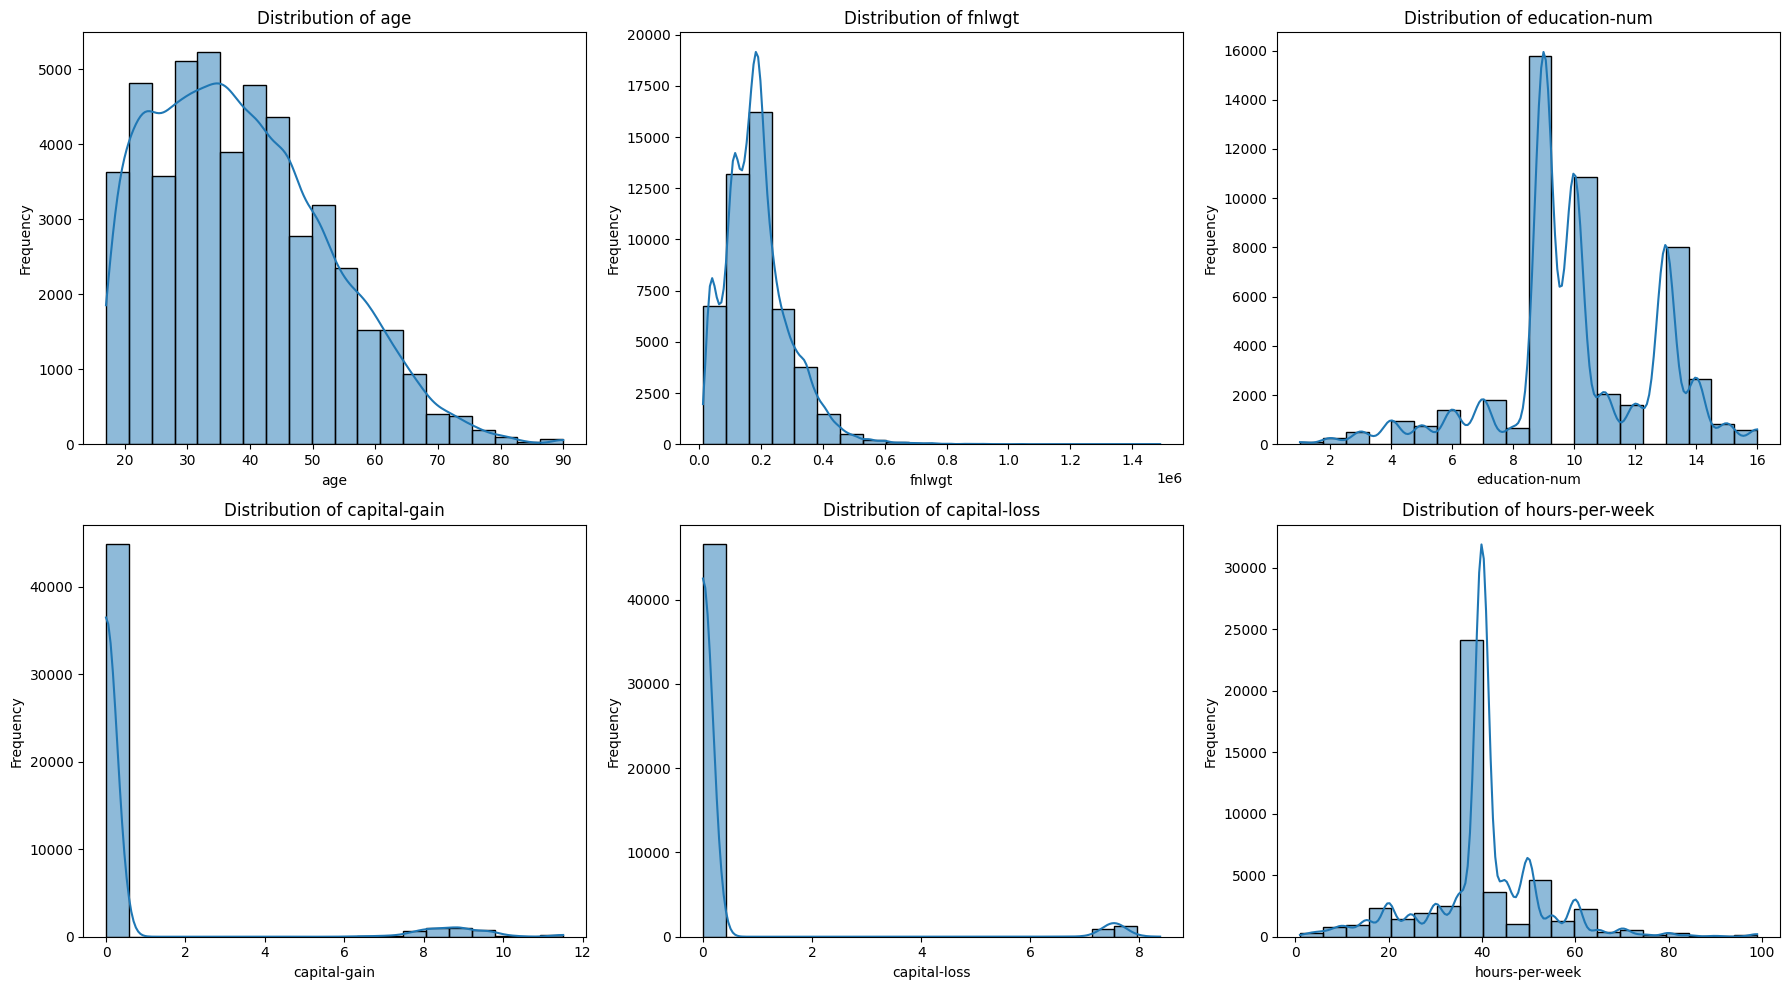

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

numerical_variables = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for i, var in enumerate(numerical_variables, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Removing "fnlwgt" column

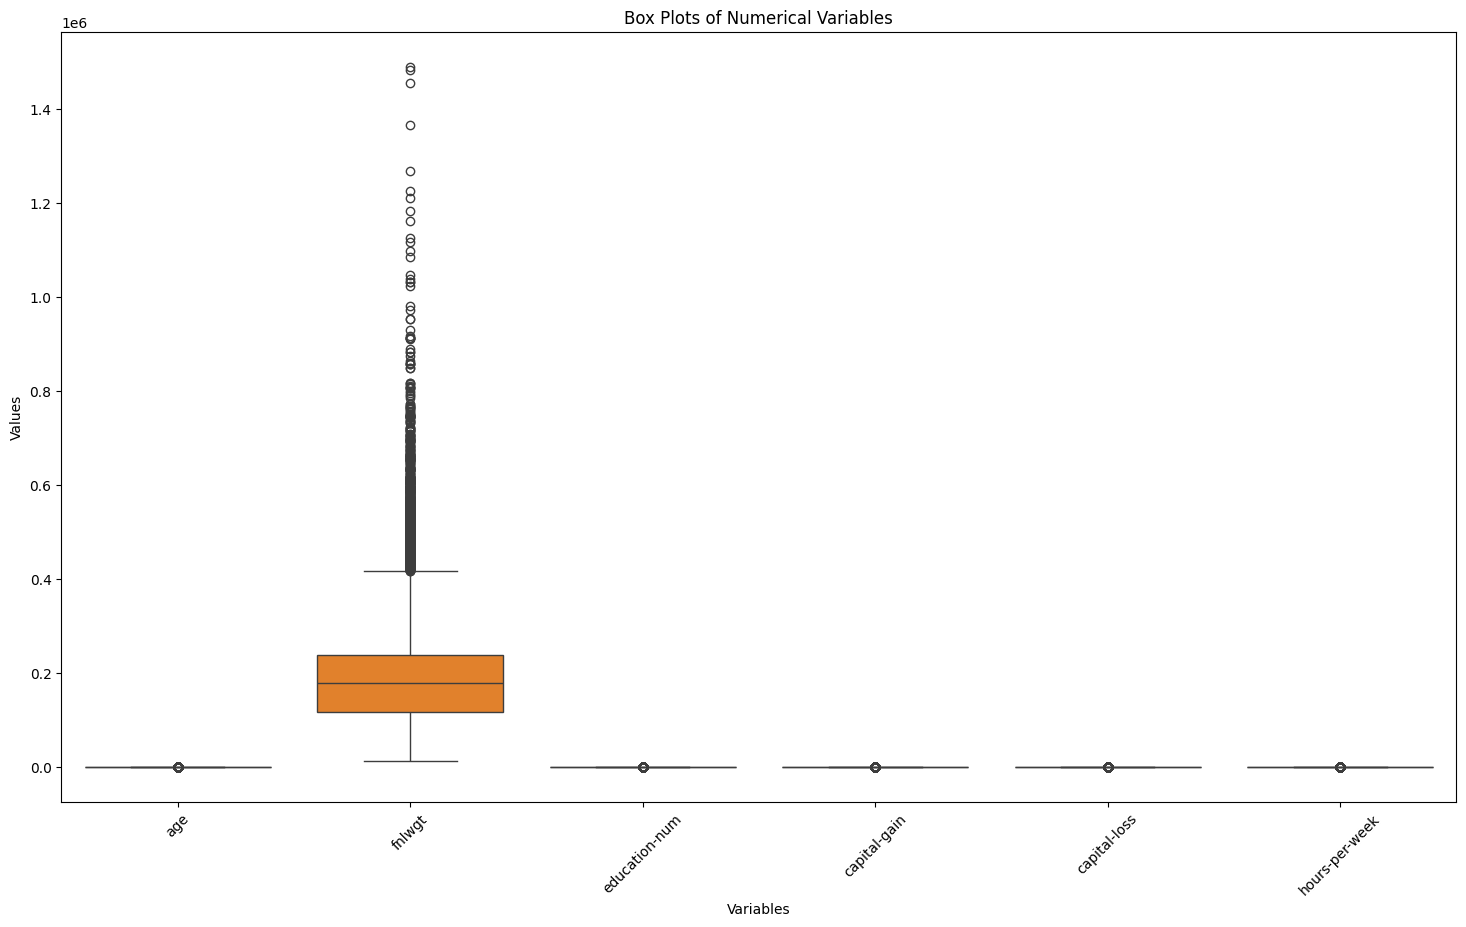

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(18, 10))  # Adjust the figsize to make the plots larger
sns.boxplot(df[numerical_vars])
plt.title('Box Plots of Numerical Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [23]:
# Removiing 'Fnlwgt' column from the dataset
df.drop(columns=['fnlwgt'], inplace=True)

Distribution of Income by Workclass

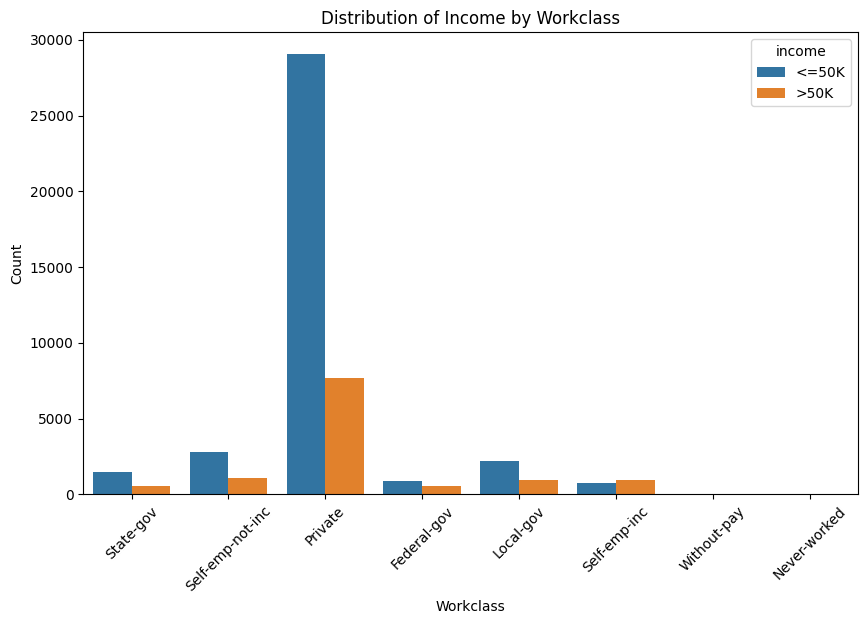

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='workclass', hue='income')
plt.title('Distribution of Income by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Income by Education

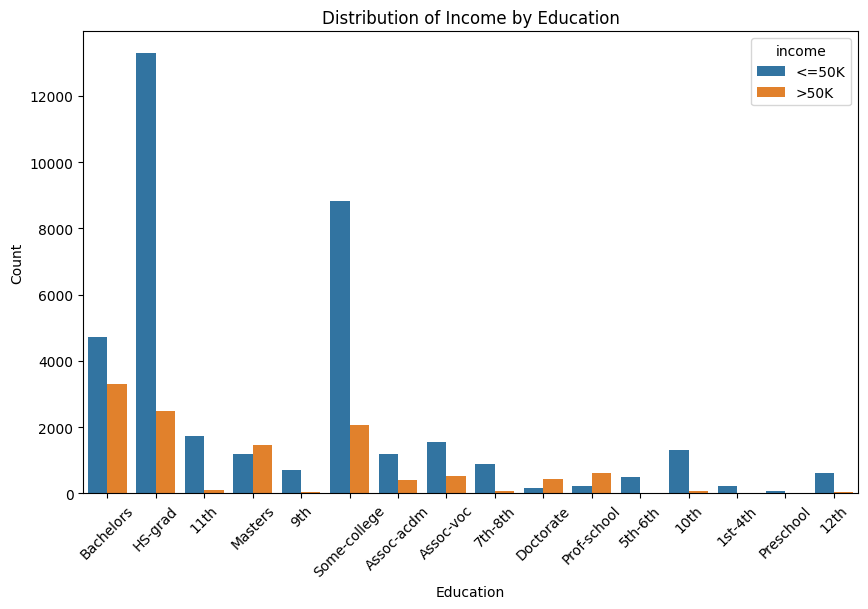

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='income')
plt.title('Distribution of Income by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Income by Marital Status

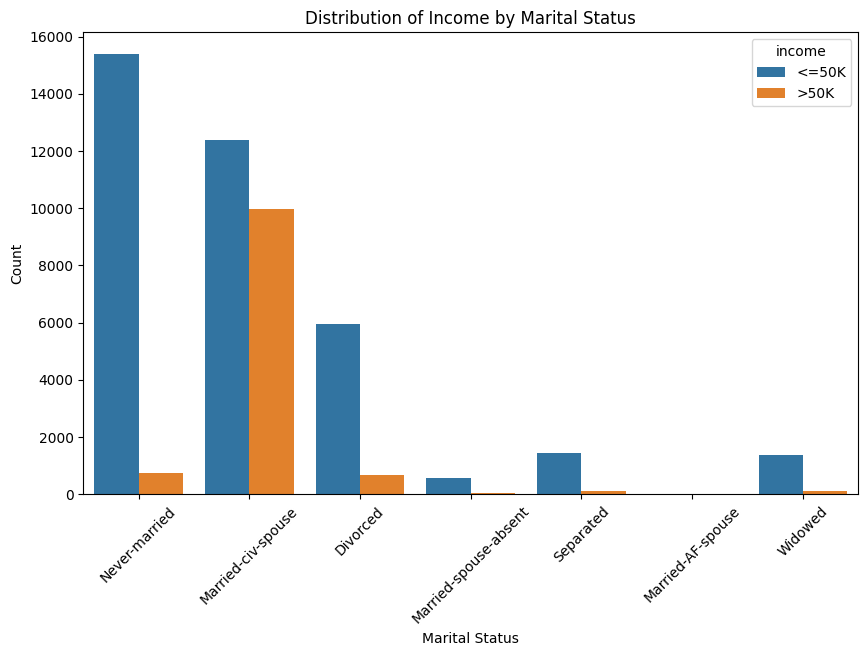

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital-status', hue='income')
plt.title('Distribution of Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Income by Occupation

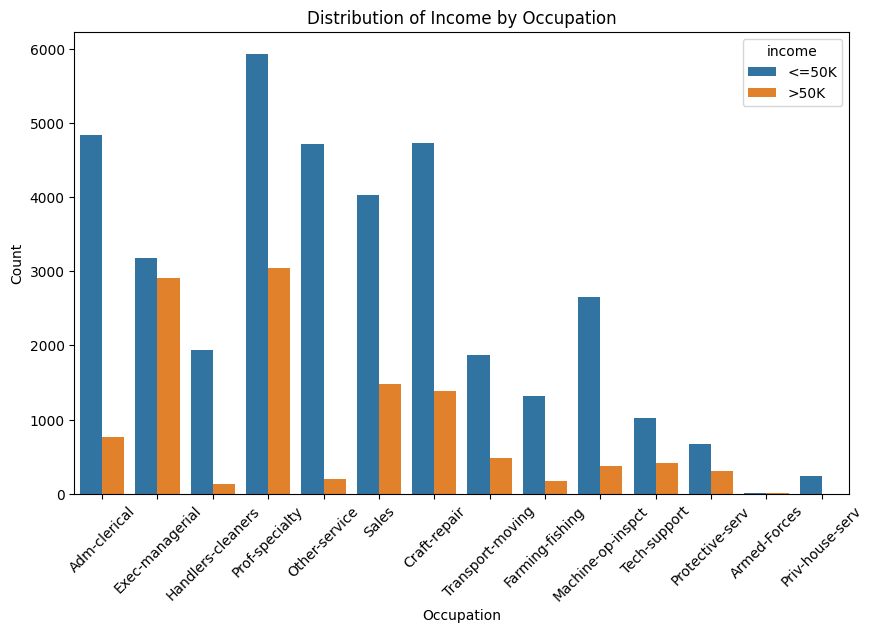

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='occupation', hue='income')
plt.title('Distribution of Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Income by Relationship

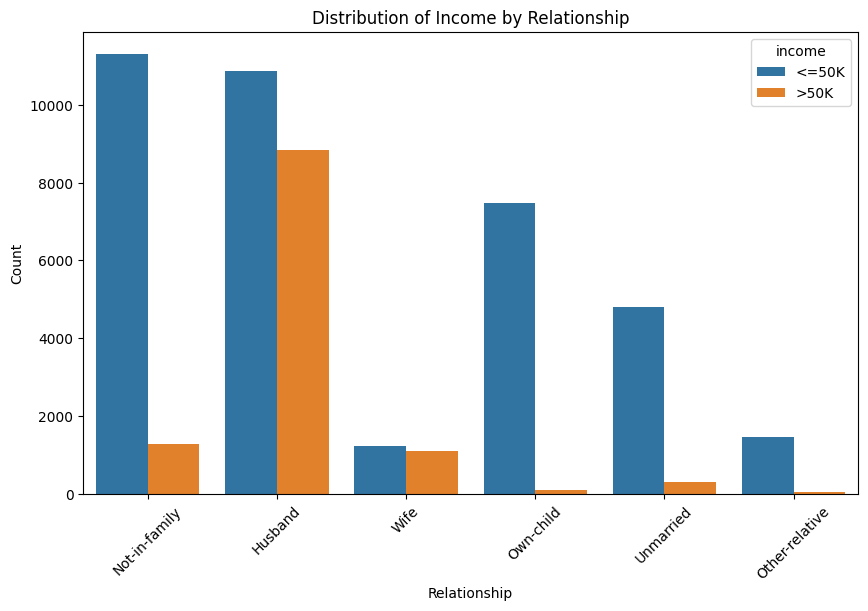

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relationship', hue='income')
plt.title('Distribution of Income by Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Income by Race

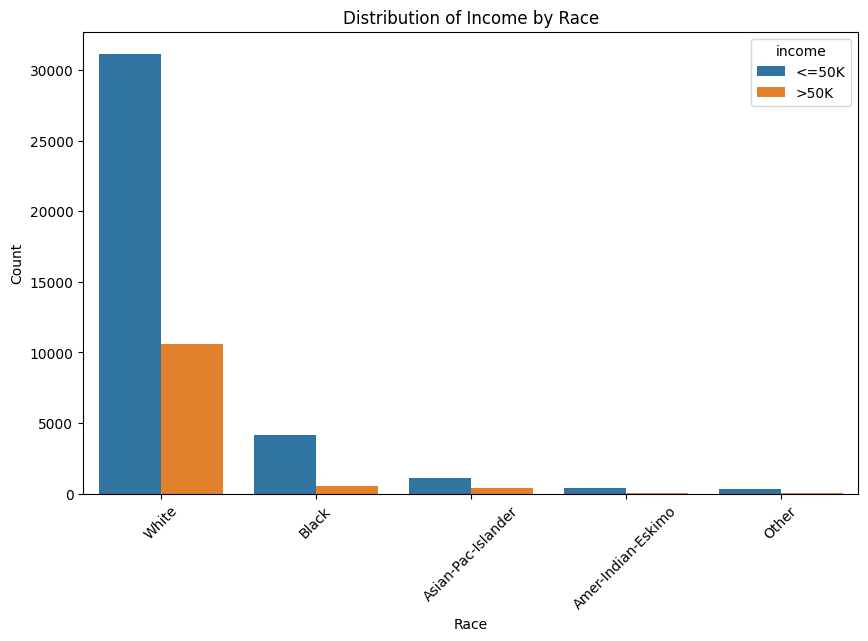

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='race', hue='income')
plt.title('Distribution of Income by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Income by Sex

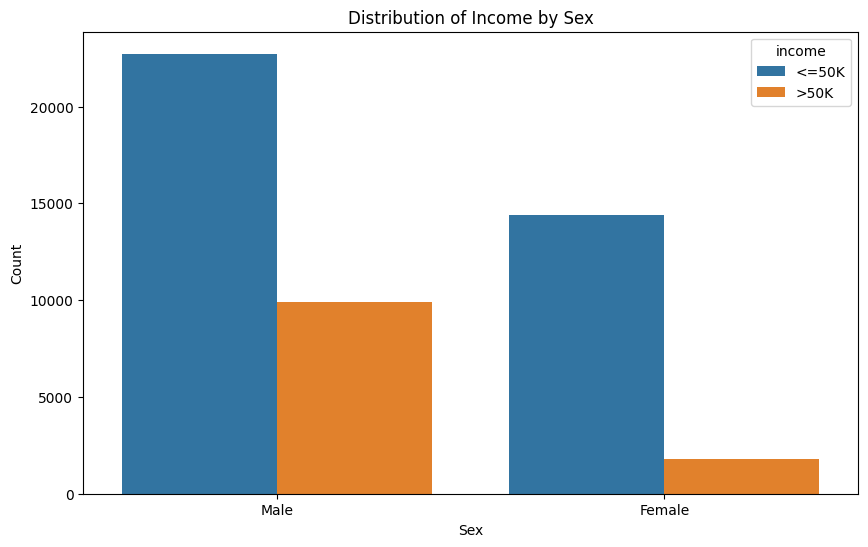

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sex', hue='income')
plt.title('Distribution of Income by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

Distribution of Income by Native Country

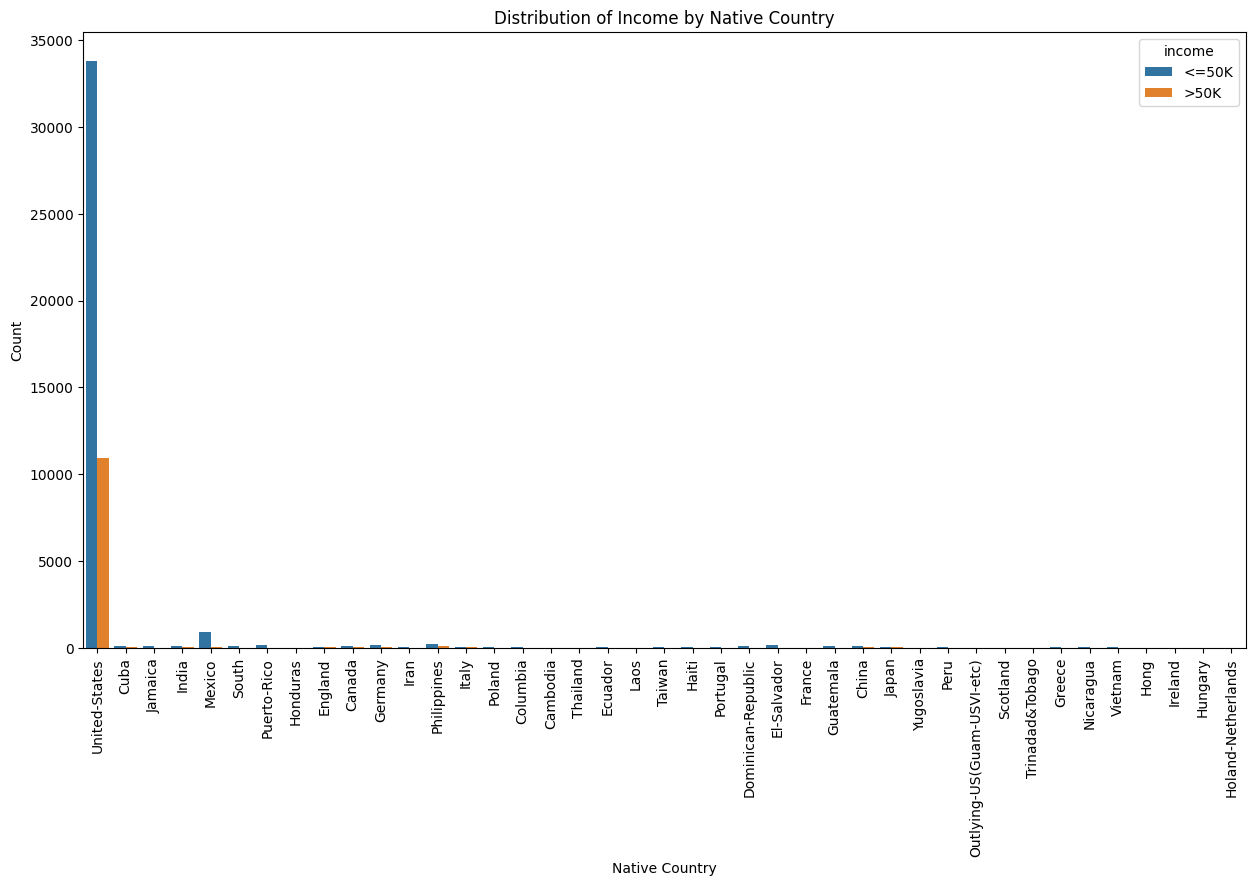

In [31]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='native-country', hue='income')
plt.title('Distribution of Income by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Distribution of income

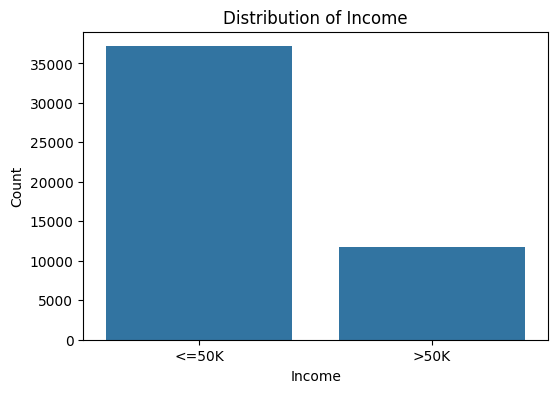

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='income')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

Encoding

In [33]:
#Encode categorical variables by replacing the categorical values with numerical labels
new_label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    new_label_encoders[column] = LabelEncoder()
    df[column] = new_label_encoders[column].fit_transform(df[column])

In [34]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,9,13,4,0,1,4,1,7.684784,0.0,40,38,0
1,50,5,9,13,2,3,0,4,1,0.000000,0.0,13,38,0
2,38,3,11,9,0,5,1,4,1,0.000000,0.0,40,38,0
3,53,3,1,7,2,5,0,2,1,0.000000,0.0,40,38,0
4,28,3,9,13,2,9,5,2,0,0.000000,0.0,40,4,0


<Axes: >

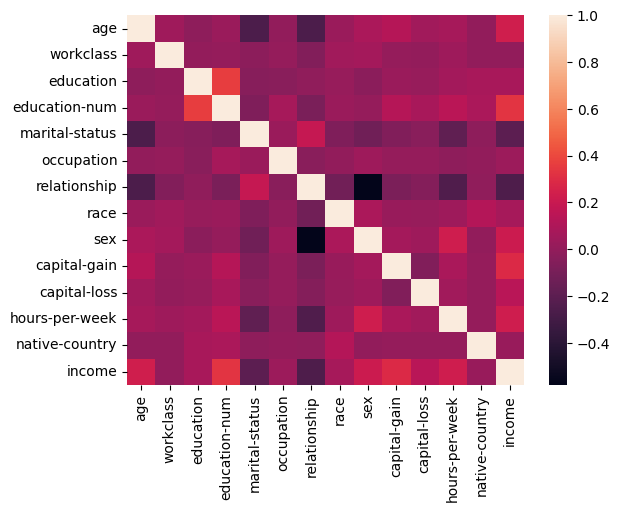

In [35]:
sns.heatmap(df.corr())

## Model Training

Random forest classifier

In [36]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model on training data
train_accuracy = accuracy_score(y_train, y_pred_train)

# Evaluate the performance of the Random Forest model on testing data
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display both training and testing accuracies
print("Training Accuracy for Random Forest Classifier:", train_accuracy)
print("Testing Accuracy for Random Forest Classifier:", test_accuracy)

# Display the classification report for testing data
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy for Random Forest Classifier: 0.9730504440406419
Testing Accuracy for Random Forest Classifier: 0.8476814412938888

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7414
           1       0.72      0.61      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model on training and testing data
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Display both training and testing accuracies for Random Forest classifier
print("Training Accuracy for Random Forest Classifier:", train_accuracy)
print("Testing Accuracy for Random Forest Classifier:", test_accuracy)

# Display the classification report for testing data
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_test))


Training Accuracy for Random Forest Classifier: 0.9746994647401211
Testing Accuracy for Random Forest Classifier: 0.8482222070565755

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11109
           1       0.71      0.62      0.66      3544

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.78     14653
weighted avg       0.84      0.85      0.84     14653



In [38]:
# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the performance of the Random Forest model
print("\nRandom Forest Model :")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Model :
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7414
           1       0.72      0.61      0.66      2355

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769

Random Forest Accuracy: 0.8476814412938888


Naïve Bayes classifier

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naïve Bayes classifier
nb_classifier = GaussianNB()

# Train the Naïve Bayes classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the training and testing data
nb_pred_train = nb_classifier.predict(X_train)
nb_pred_test = nb_classifier.predict(X_test)

# Evaluate the performance of the Naïve Bayes model on training and testing data
train_accuracy = accuracy_score(y_train, nb_pred_train)
test_accuracy = accuracy_score(y_test, nb_pred_test)

# Display both training and testing accuracies for Naïve Bayes classifier
print("Training Accuracy for Naïve Bayes Classifier:", train_accuracy)
print("Testing Accuracy for Naïve Bayes Classifier:", test_accuracy)

# Display the classification report for testing data
print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred_test))


Training Accuracy for Naïve Bayes Classifier: 0.8069766846671614
Testing Accuracy for Naïve Bayes Classifier: 0.8087828846350701

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7414
           1       0.61      0.57      0.59      2355

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.73      9769
weighted avg       0.80      0.81      0.81      9769



In [40]:
# Naïve Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

# Train the Naïve Bayes classifier
nb_classifier.fit(X_train, y_train)

# Predictions
nb_pred = nb_classifier.predict(X_test)

# Evaluation
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      7414
           1       0.61      0.57      0.59      2355

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.73      9769
weighted avg       0.80      0.81      0.81      9769

Naïve Bayes Accuracy: 0.8087828846350701
